# Wine Analysis 

By Stuart Murphy and Nick Zauner
***

### Import statements and custom functions

In [1]:
%matplotlib inline
from functions import *

### Clean data

Data collected from [Wine Enthusiast](https://www.winemag.com/) by way of Kaggle

In [2]:
raw_df = pd.read_csv('Data/winemag-data-130k-v2.csv')

In [3]:
wine_df = clean_df(raw_df)

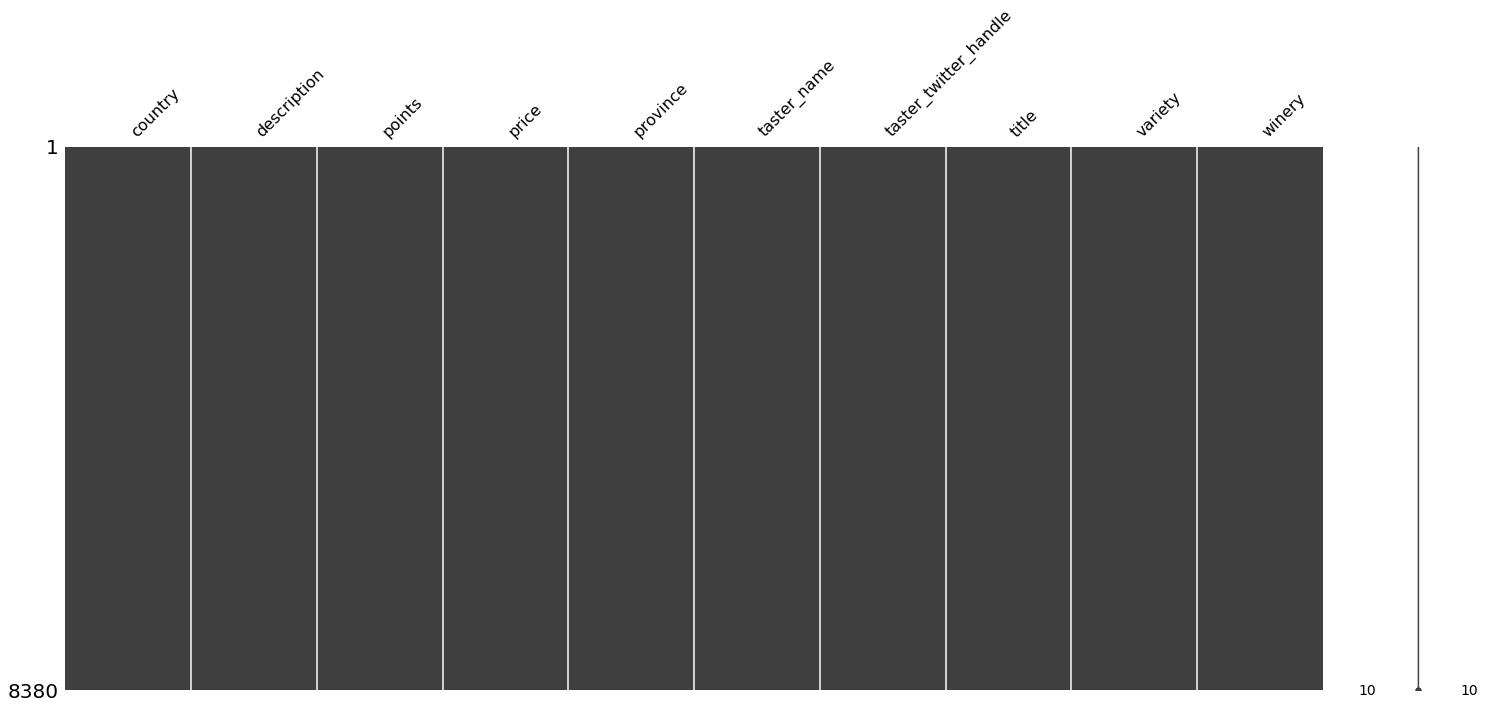

In [4]:
missingno.matrix(wine_df)

## Hypothesis 1:

**$H_{0}$:** *American wines get the same ratings as French wines:*

> $H_{0}: \mu{_a}$ = $\mu{_b}$

**$H_{1}$:** *American wines get better ratings than French wines*

> $H_{1}: \mu{_a}$ > $\mu{_b}$

We have explored the data and can see the sample sizes and variance for both American and French wine differs. Therefore, we will assess this hypothesis using Welch's T-test.

In [5]:
us_wine = wine_df.loc[wine_df['country'] == 'US']

In [6]:
french_wine = wine_df.loc[wine_df['country'] == 'France']

In [7]:
us_wine.mean()

points    88.988270
price     34.102965
dtype: float64

In [8]:
french_wine.mean()

points    88.555556
price     31.747379
dtype: float64

In [9]:
stats.shapiro(us_wine['points'])

(0.9775567054748535, 1.3038238515427114e-21)

In [10]:
stats.shapiro(french_wine['points'])

(0.9787120819091797, 2.9802211033498236e-16)

In [11]:
welch_ttest(us_wine['points'], french_wine['points'])


 Welch's t-test= 6.4154 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom = 3866.9575


In [12]:
stats.t.cdf(us_wine.points, df =24)

array([1., 1., 1., ..., 1., 1., 1.])

### Hypothesis 1: RESULTS

*We reject the **$H_{0}$:**   American wines are better than French wines*

~**$H_{0}$:** *American wines get the same ratings as French wines:*~

> ~$H_{0}: \mu{_a}$ = $\mu{_b}$~

**$H_{1}$:** *American wines get better ratings than French wines*

> $H_{1}: \mu{_a}$ > $\mu{_b}$

### Hypothesis 2:

**$H_{0}$:** *A wines rating will not be higher if it is priced above $30:*

> $H_{0}: \mu{_a}$ > $\mu{_b}$

**$H_{1}$:** *A wines rating will be higher if it is priced above $30*

> $H_{1}: \mu{_a}$ <= $\mu{_b}$

In [13]:
cheap_wine = wine_df.loc[wine_df['price'] <= 30.0]
pricey_wine = wine_df.loc[wine_df['price'] > 30.0]

In [14]:
cheap_rating_mean = cheap_wine.points.mean()
cheap_rating_std = cheap_wine.points.std()

In [15]:
pricey_rating_mean = pricey_wine.points.mean()
pricey_rating_std = pricey_wine.points.std()

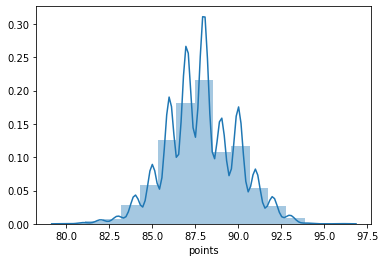

In [16]:
sns.distplot(cheap_wine['points'], bins=15)
plt.savefig('Images_Graphs/cheap_wine_dist.png', transparent=True, dpi=150, bbox_inches='tight')

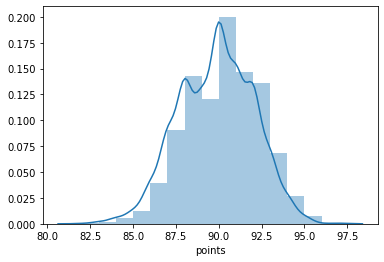

In [17]:
sns.distplot(pricey_wine['points'], bins=15)
plt.savefig('Images_Graphs/pricey_wine_dist.png', transparent=True, dpi=150, bbox_inches='tight')

In [18]:
welch_ttest(cheap_wine['points'], pricey_wine['points'])


 Welch's t-test= -41.1926 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom = 6057.5988


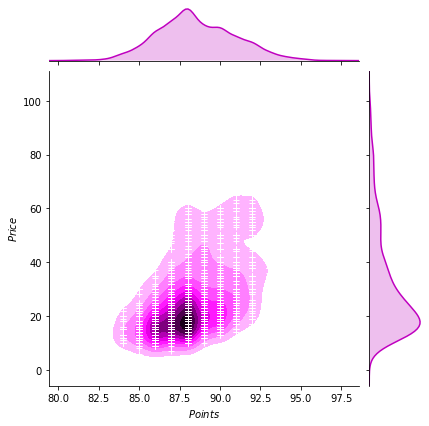

In [19]:
hyp2_plot(french_wine)
plt.savefig('Images_Graphs/french_wine_j.png', transparent=True, dpi=150, bbox_inches='tight')

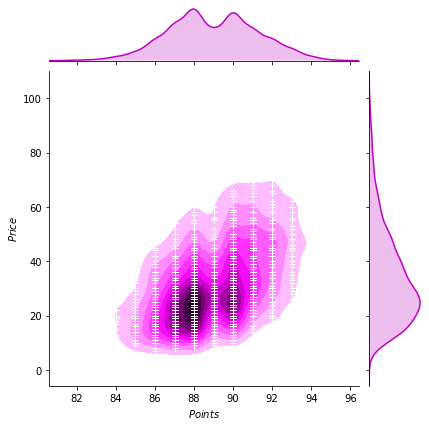

In [20]:
hyp2_plot(us_wine)
plt.savefig('Images_Graphs/us_wine_j.png', transparent=True, dpi=150, bbox_inches='tight')

### Hypothesis 2: RESULTS

*We reject the **$H_{0}$:**   A wines rating will be higher if it is priced above $30*

~**$H_{0}$:** *A wines rating will not be higher if it is priced above $30:*~

~> $H_{0}: \mu{_a}$ > $\mu{_b}$~

**$H_{1}$:** *A wines rating will be higher if it is priced above $30*

> $H_{1}: \mu{_a}$ <= $\mu{_b}$

### Hypothesis 3: 
- We establish "value" as a rating of 88+ for wines under $30

**$H_{0}$:** *American value wines cost the same as French value wines:*

> $H_{0}: \mu{_a}$ = $\mu{_b}$

**$H_{1}$:** *American value wines do not cost the same as French value wines*

> $H_{1}: \mu{_a}$ > $\mu{_b}$

In [21]:
pop_mean = wine_df.points.mean()

In [22]:
cuw = us_wine.loc[(us_wine['price'] <= 30.0) & (us_wine['points'] >= pop_mean)]

,points,price
count,627.000000,627.000000
mean,90.157895,23.347687
std,1.046345,5.265507
min,89.000000,9.000000
25%,89.000000,20.000000
50%,90.000000,24.000000
75%,91.000000,28.000000
max,94.000000,30.000000


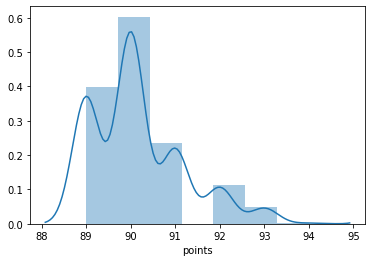

In [23]:
cheap_us_mean = cuw.points.mean()
cheap_us_std = cuw.points.std()
display(cuw.describe())
sns.distplot(cuw['points'], bins=7)

In [24]:
cfw = french_wine.loc[(french_wine['price'] <= 30.0) & (french_wine['points'] >= pop_mean)]

,points,price
count,376.000000,376.000000
mean,90.151596,22.034574
std,1.091004,5.013728
min,89.000000,10.000000
25%,89.000000,18.000000
50%,90.000000,22.000000
75%,91.000000,25.000000
max,94.000000,30.000000


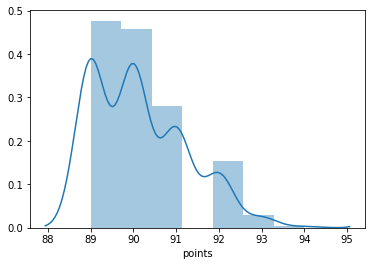

In [25]:
cheap_fr_mean = cfw.points.mean()
cheap_fr_std = cfw.points.std()
display(cfw.describe())
sns.distplot(cfw['points'], bins=7)

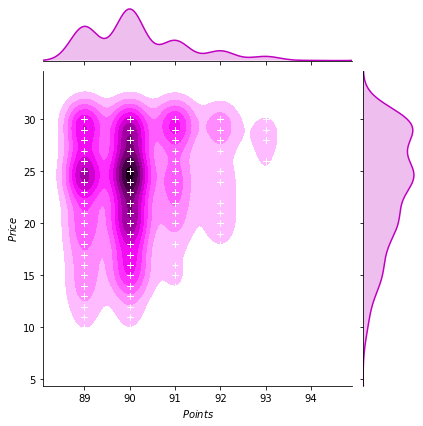

In [26]:
hyp2_plot(cuw)
plt.savefig('Images_Graphs/cuw_j.png', transparent=True, dpi=150, bbox_inches='tight')

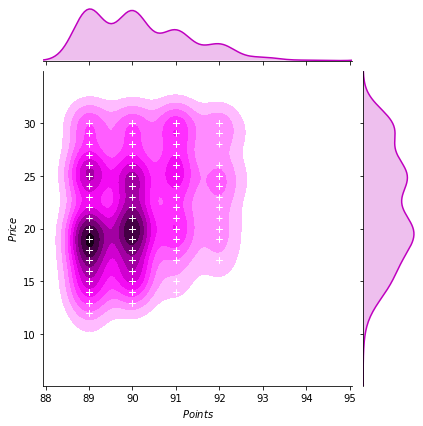

In [27]:
hyp2_plot(cfw)
plt.savefig('Images_Graphs/cfw_j.png', transparent=True, dpi=150, bbox_inches='tight')

### Hypothesis 3: RESULTS

*We reject the **$H_{0}$:**   American value wines do not cost the same as French value wines*

*-In fact we see French value wines are the better buy*

**$H_{0}$:** *American value wines cost the same as French value wines:*

> $H_{0}: \mu{_a}$ = $\mu{_b}$

**$H_{1}$:** *American value wines do not cost the same as French value wines*

> $H_{1}: \mu{_a}$ > $\mu{_b}$